In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
mud_df = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Mud.csv')
mud_df['phaeo:chl'] = mud_df['Phaeo']/mud_df['ChlA']
print(mud_df)

         Date/Time    Date TideID VegID  PlotID  PairID  Seq SVCseq  665pre  \
0    9/29/20 13:18  29-Sep    Ebb    JR     1.0     1.0  1.0      2   0.082   
1    9/29/20 13:24  29-Sep    Ebb    JR     2.0     2.0  2.0      3   0.120   
2    9/29/20 13:33  29-Sep    Ebb    JR     3.0     3.0  3.0      7   0.142   
3    9/29/20 13:37  29-Sep    Ebb    JR     4.0     4.0  4.0      8   0.111   
4    9/29/20 13:42  29-Sep    Ebb    JR     5.0     5.0  5.0      9   0.210   
..             ...     ...    ...   ...     ...     ...  ...    ...     ...   
116            NaN     NaN    NaN   NaN     NaN     NaN  NaN    NaN     NaN   
117            NaN     NaN    NaN   NaN     NaN     NaN  NaN    NaN     NaN   
118            NaN     NaN    NaN   NaN     NaN     NaN  NaN    NaN     NaN   
119            NaN     NaN    NaN   NaN     NaN     NaN  NaN    NaN     NaN   
120            NaN     NaN    NaN   NaN     NaN     NaN  NaN    NaN     NaN   

     665post  ...   Latitude  Longitude            

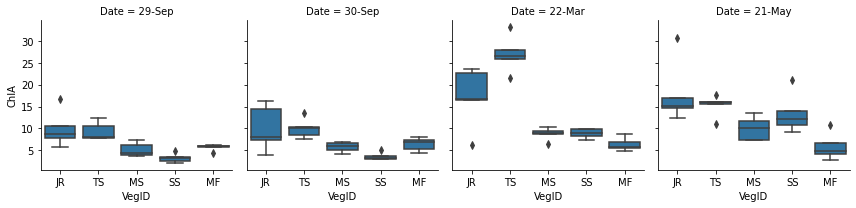

In [4]:
veg_plot = sns.FacetGrid(mud_df, col="Date", sharex=False)
veg_plot.map(sns.boxplot, 'VegID', 'ChlA', order=["JR", "TS", "MS", "SS", "MF"])
#veg_plot.savefig("chl.png", bbox_inches = 'tight')

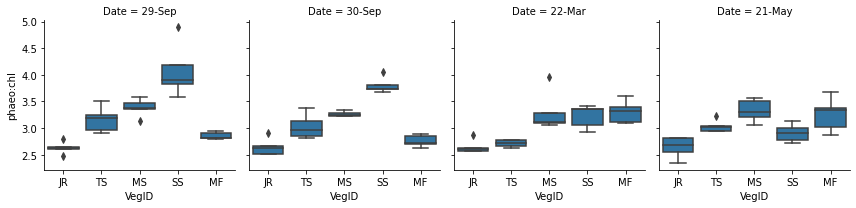

In [10]:
phaeo_plot = sns.FacetGrid(mud_df, col="Date", sharex=False)
phaeo_plot.map(sns.boxplot, 'VegID', 'phaeo:chl', order=["JR", "TS", "MS", "SS", "MF"])
#phaeo_plot.savefig("chl.png", bbox_inches = 'tight')

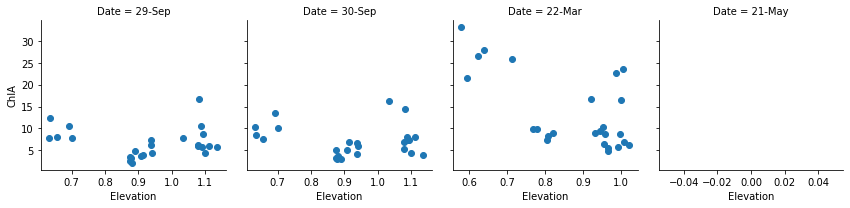

In [5]:
g = sns.FacetGrid(mud_df, col="Date", sharex=False)
g = g.map(plt.scatter, 'Elevation', 'ChlA')

<AxesSubplot:xlabel='Elevation', ylabel='ChlA'>

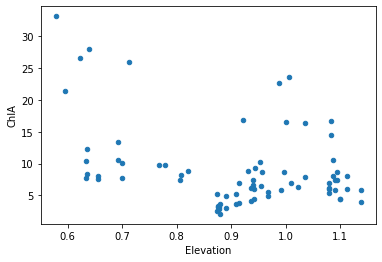

In [6]:
g_g = mud_df.plot(kind = 'scatter', x = 'Elevation', y = 'ChlA')
g_g

In [8]:
aov_chl=ols('ChlA ~ C(VegID) * C(Date)', data=mud_df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(aov_chl, typ=2))

                       sum_sq    df          F        PR(>F)
C(VegID)          1457.304501   4.0  31.923544  6.835078e-16
C(Date)            968.171890   3.0  28.278215  1.444964e-12
C(VegID):C(Date)   762.479644  12.0   5.567597  7.882776e-07
Residual           912.996698  80.0        NaN           NaN
